# Задание 2:
Взять датасет titanic (прошлое задание)

Обучить на нем 3 модели классификации - логистическую регрессию, дерево решений и алгоритм knn

Построить график сравнения roc-кривых моделей на тестовой выборки

Вывести ROC AUC SCORE для каждой из моделей

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# загружаем данные
df = pd.read_csv('train.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Предобработка

In [4]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [5]:
df.describe(include=[ 'object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dahlberg, Miss. Gerda Ulrika",male,347082,G6,S
freq,1,577,7,4,644


In [6]:
df['Embarked'] = df['Embarked'].fillna('S')

In [7]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [8]:
df=pd.get_dummies(df, columns=['Embarked'])
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0


In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [10]:
df_work = df[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S']]

In [12]:
X = df_work[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S']]
y = df_work.Survived

In [13]:
# разделяем данные на тренировочные и тестовые
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [14]:
# приводим данные к одному масштабу
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# возвращаем к типу датафрейма
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Обучение классификатора дерева принятия решений и подбор глубины

In [16]:
clf = DecisionTreeClassifier()

In [17]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
from sklearn.model_selection import GridSearchCV
cs = np.array([i for i in range(2,101)])
cs

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100])

In [19]:
grid = {'max_depth': cs}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='accuracy', cv=5)

In [20]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='de...
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,

In [21]:
gridsearch.best_params_

{'max_depth': 3}

In [22]:
best_param = gridsearch.best_params_["max_depth"]

In [23]:
clf = DecisionTreeClassifier(max_depth=best_param)

In [24]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Построить график сравнения roc-кривых моделей на тестовой выборке

Вывести ROC AUC SCORE

In [28]:
pred_proba = clf.predict_proba(X_test)

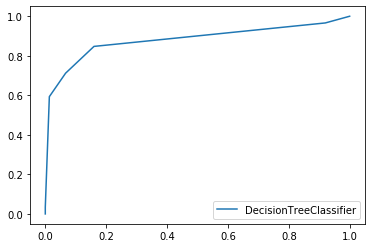

In [29]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, pred_proba[: ,1])
plt.plot(fpr,tpr,label="DecisionTreeClassifier")
plt.legend(loc=4)
plt.show()

In [68]:
print('ROC AUC SCORE:', metrics.roc_auc_score(y_test, pred_proba[: ,1]))

ROC AUC SCORE: 0.87954802259887


# Обучаем алгоритм knn

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
clf_knn = KNeighborsClassifier(n_neighbors = 7)
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

Построить график сравнения roc-кривых моделей на тестовой выборке

Вывести ROC AUC SCORE

In [64]:
pred_proba_knn = clf_knn.predict_proba(X_test)

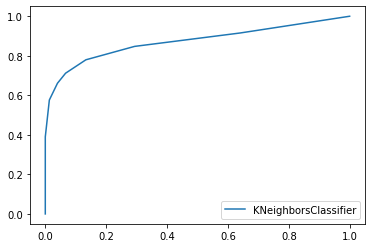

In [65]:
fpr, tpr, _ = metrics.roc_curve(y_test, pred_proba_knn[: ,1])
plt.plot(fpr,tpr,label="KNeighborsClassifier")
plt.legend(loc=4)
plt.show()

In [67]:
print('ROC AUC SCORE:', metrics.roc_auc_score(y_test, pred_proba_knn[: ,1]))

ROC AUC SCORE: 0.871412429378531


# Обучаем логистическую регрессию

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
clf_reg = LogisticRegression()
clf_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Построить график сравнения roc-кривых моделей на тестовой выборке

Вывести ROC AUC SCORE

In [71]:
pred_proba_reg = clf_reg.predict_proba(X_test)

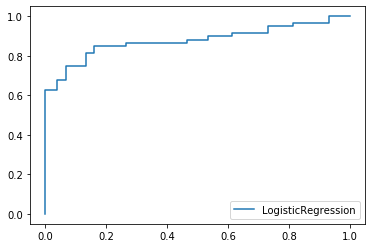

In [72]:
fpr, tpr, _ = metrics.roc_curve(y_test, pred_proba_reg[: ,1])
plt.plot(fpr,tpr,label="LogisticRegression")
plt.legend(loc=4)
plt.show()

In [73]:
print('ROC AUC SCORE:', metrics.roc_auc_score(y_test, pred_proba_reg[: ,1]))

ROC AUC SCORE: 0.8768361581920904
